In [8]:
import requests
import requests as req
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import praw
from bs4 import BeautifulSoup
import time
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag




[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# Reddit
reddit = praw.Reddit(client_id ='XTt2t1E8bPGRk4pmxGqkeA',
                     client_secret ='A_b8L11XmCOJJzCg51WXoh7mw_6ZTw',
                     username = 'Vagarbond',
                     password = 'London55',
                     user_agent ='Summative')

# Reddit Politics Subreddit NEW TOPICS US

subreddit_us = reddit.subreddit('politics')
# Hot posts 

uspol_posts = subreddit_us.new(limit = 2000)


for post in uspol_posts:
    print(post.title)

Trump seeks to delay New York fraud case, could push trial to 2024
Kevin O’Leary calls AOC ‘great at killing jobs,’ New York ‘uninvestable’
Florida house bill takes aim at transgender treatment and doctors involved
Biden enlists potential rivals as advisers ahead of 2024
DeSantis takes his culture war to Texas Gov. Greg Abbott’s turf
Maryland mayor arrested on child porn charges, resigns
Former Trump lawyer Michael Cohen expects to testify ‘very soon’ to grand jury
Maryland mayor facing child porn charges previously said Pete Buttigieg was his mentor
Sanders Rejects Starbucks Push for Subordinates to Testify Instead of CEO Schultz. "Howard Schultz may be a multibillionaire, but he has got to understand that he and the multibillion-dollar corporation he runs are not above the law."
Free Chat Friday Thread
A Proclamation on Read Across America Day, 2023
I’m Richard Rubin, a U.S. tax policy reporter for The Wall Street Journal. I write a lot about the IRS and the intersection of taxes, le

In [10]:
# Post Data for US Politics
subreddit_us = reddit.subreddit('politics')
uspol_posts = subreddit_us.new(limit = 5)

post_data = []
for post in uspol_posts:
    post_data.append([post.title, post.author.name, post.score, post.num_comments, post.created_utc])

# DataFrame

uspol_df = pd.DataFrame(post_data, columns = ['Title', 'Author', 'Score', 'Num Comments', 'Created UTC'])

# Top Posts

uspol_df = uspol_df.sort_values(by ='Score', ascending = False).head(5)
uspol_df

,Title,Author,Score,Num Comments,Created UTC
0,"Trump seeks to delay New York fraud case, coul...",infinitum3d,4,1,1.677867e+09
2,Florida house bill takes aim at transgender tr...,adamwrites19,3,1,1.677867e+09
4,DeSantis takes his culture war to Texas Gov. G...,AngierCutterBorden,3,1,1.677866e+09
3,Biden enlists potential rivals as advisers ahe...,washingtonpost,1,4,1.677866e+09
1,Kevin O’Leary calls AOC ‘great at killing jobs...,YCantWeJustGetAlong_,0,2,1.677867e+09


In [11]:
subreddit_us = reddit.subreddit('politics')
us_posts = subreddit_us.new(limit = 2000)

# Titles and Source Only
us_data = []
for post in us_posts:
    us_data.append({'Title': post.title, 'Source': 'Reddit US Politics'})
uspol_Reddit = pd.DataFrame(us_data)
uspol_Reddit

,Title,Source
0,"Trump seeks to delay New York fraud case, coul...",Reddit US Politics
1,Kevin O’Leary calls AOC ‘great at killing jobs...,Reddit US Politics
2,Florida house bill takes aim at transgender tr...,Reddit US Politics
3,Biden enlists potential rivals as advisers ahe...,Reddit US Politics
4,DeSantis takes his culture war to Texas Gov. G...,Reddit US Politics
...,...,...
985,Florida college students planning statewide wa...,Reddit US Politics
986,Hawaii Car Insurance Would Cost More Under Leg...,Reddit US Politics
987,Proposed SC bill could make abortion a death p...,Reddit US Politics
988,President Joe Biden shares update on East Pale...,Reddit US Politics


In [12]:
# Reddit UK Politics Subreddit NEW TOPICS 
subreddit_uk = reddit.subreddit('ukpolitics')

# New posts 
ukpol_posts = subreddit_uk.new(limit = 2000)

for post in ukpol_posts:
    print(post.title)

Labour will not ‘snipe’ or ‘play political games’ over Northern Ireland deal, Starmer says
Week-in-Review: Covid sleaze is back and more politically potent than ever - Politics.co.uk
Britain’s Stop the War Coalition holds sparsely attended London rally against Ukraine war
First class stamp price to rise to £1.10
Horizon: Scientists warn Sunak on EU research programme
Two unions suspend ambulance strikes in England as talks reopen
Windsor Framework: Unionists to get 'legal reassurances'
Sunak is the Michael Corleone of the Tory party – try as he might to break free, he’s up to his neck in it | Jonathan Freedland
UK Labour wants business ‘fingerprints’ on its plans as Blair’s moneymen woo donors
No 10 gives DUP legal ‘assurances’ that Northern Ireland will remain in UK
Are there any centrist and/or unbiased weekly political publications?
Medical students urged to fill gaps when junior doctors strike in England
🚨NEW SNP Membership Poll for @Telegraph 📈Yousaf leads Forbes narrowly with lar

In [13]:
# Data for UK Politics
subreddit_uk = reddit.subreddit('ukpolitics')
ukpol_posts = subreddit_uk.hot(limit = 5)

post_data = []
for post in ukpol_posts:
    post_data.append([post.title, post.author.name, post.score, post.num_comments, post.created_utc])

# DataFrame
ukpol_df = pd.DataFrame(post_data, columns = ['Title', 'Author', 'Score', 'Num Comments', 'Created UTC'])

# Top Posts
ukpol_df = ukpol_df.sort_values(by ='Score', ascending = False).head(5)
ukpol_df


,Title,Author,Score,Num Comments,Created UTC
2,Johnson may have misled Parliament over partie...,meltedbrain123,431,82,1.677848e+09
4,Matt Hancock: More leaked texts put spotlight ...,meltedbrain123,402,140,1.677827e+09
3,NEW: Understand the privileges committee *COUL...,Rimalda,293,54,1.677836e+09
1,"I'm Fraser Nelson, editor of The Spectator. AM...",Fraser_Nelson,89,198,1.677842e+09
0,Daily Megathread - 03/03/2023,ukpolbot,23,1451,1.677823e+09


In [14]:
# DataFrames for only Titles and Source: UK subreddit
subreddit_uk = reddit.subreddit('ukpolitics')
uk_posts = subreddit_uk.hot(limit = 2000)

uk_data = []
for post in uk_posts:
    uk_data.append({'Title': post.title, 'Source': 'Reddit UK Politics'})
ukpol_Reddit = pd.DataFrame(uk_data)
ukpol_Reddit

,Title,Source
0,Daily Megathread - 03/03/2023,Reddit UK Politics
1,"I'm Fraser Nelson, editor of The Spectator. AM...",Reddit UK Politics
2,Johnson may have misled Parliament over partie...,Reddit UK Politics
3,NEW: Understand the privileges committee *COUL...,Reddit UK Politics
4,Matt Hancock: More leaked texts put spotlight ...,Reddit UK Politics
...,...,...
914,Jayne McCormack: DUP MP says if the role of th...,Reddit UK Politics
915,British Gas owner Centrica sees profits soar a...,Reddit UK Politics
916,BBC Question Time Live Thread (8pm iPlayer & 1...,Reddit UK Politics
917,UK Retail Sales Rise Unexpectedly With January...,Reddit UK Politics


In [15]:
# All Reddit Politics Title Data in Dataframe
combined_df = pd.concat([ukpol_Reddit, uspol_Reddit], ignore_index=True)

combined_df

,Title,Source
0,Daily Megathread - 03/03/2023,Reddit UK Politics
1,"I'm Fraser Nelson, editor of The Spectator. AM...",Reddit UK Politics
2,Johnson may have misled Parliament over partie...,Reddit UK Politics
3,NEW: Understand the privileges committee *COUL...,Reddit UK Politics
4,Matt Hancock: More leaked texts put spotlight ...,Reddit UK Politics
...,...,...
1904,Florida college students planning statewide wa...,Reddit US Politics
1905,Hawaii Car Insurance Would Cost More Under Leg...,Reddit US Politics
1906,Proposed SC bill could make abortion a death p...,Reddit US Politics
1907,President Joe Biden shares update on East Pale...,Reddit US Politics


In [16]:
# API endpoint and parameters
url = 'https://content.guardianapis.com/search'
params = {
    'q': 'politics',
    'page-size': 200,
    'api-key': 'b5edf1ef-c8c8-44d8-b7a0-b4ab0b7edb5a'
}

# Make request and extract titles from each page
GUARD = []
for page_num in range(1, 6):
    params['page'] = page_num
    response = requests.get(url, params=params).json()
    data = response['response']['results']
    for article in data:
        title = article['webTitle']
        GUARD.append({'Title': title, 'Source': 'The Guardian'})
        
# Dataframe
GUARD_df = pd.DataFrame(GUARD)

GUARD_df

,Title,Source
0,A gut feeling about Liz Truss’s politics | Bri...,The Guardian
1,Misogyny in politics shows no sign of abating ...,The Guardian
2,Will the reshuffle save Sunak? Politics Weekly...,The Guardian
3,Does Britain really regret Brexit? – Politics ...,The Guardian
4,The power of the union? Politics Weekly UK,The Guardian
...,...,...
995,UK politics: Boris Johnson defends national in...,The Guardian
996,Cracks appear among Iran elite as senior figur...,The Guardian
997,Guardian appoints Pippa Crerar as new politica...,The Guardian
998,UK politics live: Boris Johnson imposes sancti...,The Guardian


In [17]:
# BBC API
url = ('https://newsapi.org/v2/everything?'
       'q=Politics&'
       'sources=bbc-news&'
       'apiKey=e4f08f613c5c41be8e7571ccd3e2bb3c')
BBC = []
for page_num in range(1, 11):
    page_params = f'&page={page_num}'
    response = requests.get(url).json()
    data = response['articles']
    for article in data:
        title = article['title']
        BBC.append({'Title': title, 'Source': 'BBC News'})

# Dataframe
BBC_df = pd.DataFrame(BBC)

print(BBC_df)

                                                 Title    Source
0    A look back at Nicola Sturgeon's life in politics  BBC News
1    Philippines People Power: Who survives Bongbon...  BBC News
2    Delhi's Manish Sisodia arrested over corruptio...  BBC News
3    Ukraine war: Russia must be defeated but not '...  BBC News
4       Final stamps bearing the Queen's head revealed  BBC News
..                                                 ...       ...
995  Ben Wallace slaps down minister Johnny Mercer ...  BBC News
996  PMQs: SNP demands 'special' Brexit status for ...  BBC News
997  Five things about Scottish politicians' tax re...  BBC News
998  Manish Sisodia: Protests planned in Delhi over...  BBC News
999  SNP leadership: Will faith turn the tide for S...  BBC News

[1000 rows x 2 columns]


In [18]:
# ABC News API
url = ('https://newsapi.org/v2/everything?'
       'q=Politics&'
       'sources=abc-news&'
       'apiKey=e4f08f613c5c41be8e7571ccd3e2bb3c')

ABC = []
for page_num in range(1, 11):
    params['page'] = page_num
    response = requests.get(url).json()
    data = response['articles']
    for article in data:
        title = article['title']
        ABC.append({'Title': title, 'Source': 'ABC News'})

# Dataframe
ABC_df = pd.DataFrame(ABC)

print(ABC_df)

                                                 Title    Source
0    Scottish leader, supporter of independence, to...  ABC News
1    Betty Boothroyd, first female UK Commons speak...  ABC News
2    Former FTX exec pleads guilty to charges relat...  ABC News
3    Texas Gov. Greg Abbott says diversity efforts ...  ABC News
4    A year into Russia's invasion of Ukraine, how ...  ABC News
..                                                 ...       ...
995          Chicago: What to expect on election night  ABC News
996  Former Virgin Galactic CEO enters US House rac...  ABC News
997  Danish former minister charged with revealing ...  ABC News
998  Prosecution rests in ex-Ohio House speaker's b...  ABC News
999  Republicans set opening presidential debate fo...  ABC News

[1000 rows x 2 columns]


In [19]:
# CNN News 
url = ('https://newsapi.org/v2/everything?'
       'q=Politics&'
       'sources=cnn&'
       'apiKey=e4f08f613c5c41be8e7571ccd3e2bb3c')

CNN = []
for page_num in range(1, 11):
    params['page'] = page_num
    response = requests.get(url).json()
    data = response['articles']
    for article in data:
        title = article['title']
        CNN.append({'Title': title, 'Source': 'CNN News'})

# Dataframe
CNN_df = pd.DataFrame(CNN)

print(CNN_df)

                                                 Title    Source
0    White House looks to undercut GOP arguments ah...  CNN News
1    Opinion: Republicans shouldn't underestimate T...  CNN News
2    A juicy new book explores the cultural history...  CNN News
3    A lot of conservative 'churn' as Fox News is u...  CNN News
4    Koch network plans to back a Republican -- oth...  CNN News
..                                                 ...       ...
995               Opinion: Biden's very tough decision  CNN News
996  Republicans' extreme reaction to Biden's big s...  CNN News
997  Elon Musk pledged transparency at Twitter. But...  CNN News
998  Joe Biden hates when people talk about his age...  CNN News
999  The US says it saved 25 million lives -- and m...  CNN News

[1000 rows x 2 columns]


In [20]:
# FOX News
url = ('https://newsapi.org/v2/everything?'
       'q=Politics&'
       'sources=fox-news&'
       'apiKey=e4f08f613c5c41be8e7571ccd3e2bb3c')

FOX = []
for page_num in range(1, 11):
    params['page'] = page_num
    response = requests.get(url).json()
    data = response['articles']
    for article in data:
        title = article['title']
        FOX.append({'Title': title, 'Source': 'Fox News'})

# Dataframe
FOX_df = pd.DataFrame(FOX)

print(FOX_df)

                                                 Title    Source
0                 The right way to listen to a podcast  Fox News
1                     Fox News Politics: She's running  Fox News
2                     Fox News Politics: Eyes on Biden  Fox News
3        Fox News Politics: Nikki Haley's 'prime' time  Fox News
4       Fox News Politics: Mayor Lori Lightfoot's fate  Fox News
..                                                 ...       ...
995  Longshot potential 2024 presidential candidate...  Fox News
996  Jill Biden, Douglas Emhoff go viral for awkwar...  Fox News
997  House Democrats’ campaign chair accuses Republ...  Fox News
998  GOP Rep. Victoria Spartz to retire from Congre...  Fox News
999  Janice Dean still fighting for accountability,...  Fox News

[1000 rows x 2 columns]


In [21]:
import requests as req
import time
import pandas as pd

API_KEY = 'Q6wf5zjWrsOfOeC0KvCG9X4fjIwZGED4' 
TOPIC ='Politics'

headings = []
for i in range(120):
    url='https://api.nytimes.com/svc/search/v2/articlesearch.json?q='+TOPIC+'&api-key='+API_KEY+'&page='+str(i)
    response = req.get(url).json()
    time.sleep(6)
    docs = response['response']['docs']
    for doc in docs:
        heading = doc['headline']['main']
        source = 'New York Times'
        headings.append({'Title': heading, 'Source': source})

# Create a dataframe
df = pd.DataFrame(headings)
print(df)

                                                  Title          Source
0     Indian Americans Rapidly Climbing Political Ranks  New York Times
1     Bipartisan Plans to Move Aggressively on China...  New York Times
2     What We Know and Don’t Know About the Origins ...  New York Times
3     Rick Scott Drops Social Security From Plan as ...  New York Times
4     Biden Bows to Republicans on Blocking D.C. Cri...  New York Times
...                                                 ...             ...
1195  $20 Million Worth of Looted Art Returns to Ita...  New York Times
1196  Back on the Bench to Announce Opinions, Suprem...  New York Times
1197  Central Question as Georgia Inquiry Wraps: Wil...  New York Times
1198  House Jan. 6 Committee Signals It Will Issue C...  New York Times
1199  Inflation Is So High in Egypt That Eggs Are a ...  New York Times

[1200 rows x 2 columns]


In [22]:
News_df = pd.concat([BBC_df, ABC_df, CNN_df, FOX_df,uspol_Reddit,ukpol_Reddit,GUARD_df, df], ignore_index=True)

News_df

,Title,Source
0,A look back at Nicola Sturgeon's life in politics,BBC News
1,Philippines People Power: Who survives Bongbon...,BBC News
2,Delhi's Manish Sisodia arrested over corruptio...,BBC News
3,Ukraine war: Russia must be defeated but not '...,BBC News
4,Final stamps bearing the Queen's head revealed,BBC News
...,...,...
8104,$20 Million Worth of Looted Art Returns to Ita...,New York Times
8105,"Back on the Bench to Announce Opinions, Suprem...",New York Times
8106,Central Question as Georgia Inquiry Wraps: Wil...,New York Times
8107,House Jan. 6 Committee Signals It Will Issue C...,New York Times


In [23]:
# Processing the Text Data for Analysis
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [24]:
# Removed Capitalisation, Punctuation and Stop words, Lemmatized for noun and verb and kept in lower case    

def original(text):
    
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text )
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    pos_tags = pos_tag(words)
             
    lemmatized_words = []
             
    for word, tag in pos_tags:
        if tag.startswith('N'): 
            lemmatized_words.append(lemmatizer.lemmatize(word, pos ='n'))
        elif tag.startswith('V'): 
            lemmatized_words.append(lemmatizer.lemmatize(word, pos ='v'))
        else:
            lemmatized_words.append(word)
   
    return ' '.join(lemmatized_words)
    

News_df['Title_lemmatized'] = News_df['Title'].apply(original)
print(News_df['Title_lemmatized'].head(10))

0              look back nicola sturgeon life politics
1    philippine people power survive bongbong marco...
2    delhis manish sisodia arrest corruption allega...
3    ukraine war russia must defeat crushed macron say
4                   final stamp bear queen head reveal
5    nigeria election 2023 young people pin hop pre...
6    turkey election biggest test erdogan amid cost...
7    earthquakehit syria open two border crossing a...
8               congressman plague bizarre mix scandal
9       king charles unadorned new stamp design reveal
Name: Title_lemmatized, dtype: object


In [25]:
# Top 10 Most Frequent Words
text = ' '.join(News_df['Title_lemmatized'])
wordss = pd.Series(text.split())
wordss = wordss.value_counts()
top_10 = wordss.head(10)
print(top_10)

politics     635
say          593
biden        515
gop          356
trump        351
new          343
uk           331
us           308
state        290
political    289
dtype: int64


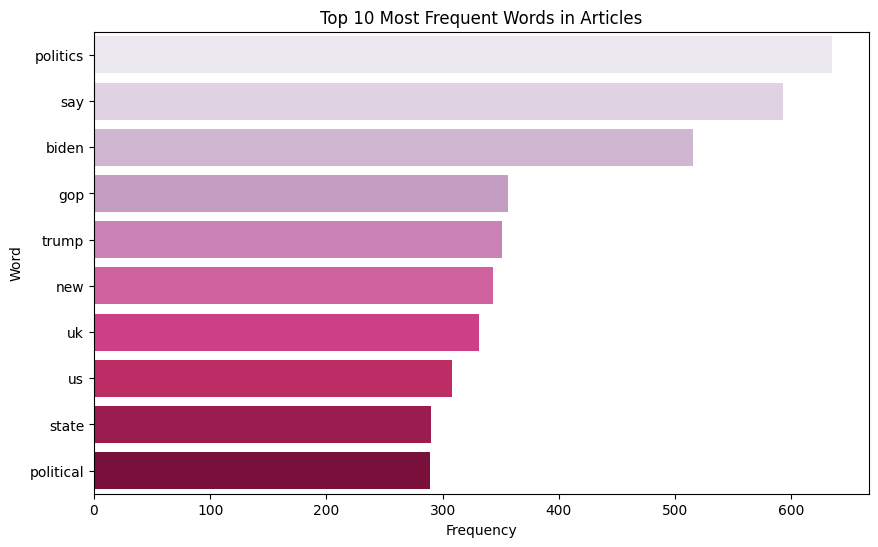

In [26]:
# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x = top_10.values, y = top_10.index, palette = 'PuRd')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 10 Most Frequent Words in Articles')
plt.show()

In [27]:
News_df['Title_lemmatized'] = News_df['Title'].apply(original)
df['Source'] = News_df['Source']

News_df 

,Title,Source,Title_lemmatized
0,A look back at Nicola Sturgeon's life in politics,BBC News,look back nicola sturgeon life politics
1,Philippines People Power: Who survives Bongbon...,BBC News,philippine people power survive bongbong marco...
2,Delhi's Manish Sisodia arrested over corruptio...,BBC News,delhis manish sisodia arrest corruption allega...
3,Ukraine war: Russia must be defeated but not '...,BBC News,ukraine war russia must defeat crushed macron say
4,Final stamps bearing the Queen's head revealed,BBC News,final stamp bear queen head reveal
...,...,...,...
8104,$20 Million Worth of Looted Art Returns to Ita...,New York Times,20 million worth loot art return italy us
8105,"Back on the Bench to Announce Opinions, Suprem...",New York Times,back bench announce opinion supreme court rule...
8106,Central Question as Georgia Inquiry Wraps: Wil...,New York Times,central question georgia inquiry wrap trump fa...
8107,House Jan. 6 Committee Signals It Will Issue C...,New York Times,house jan 6 committee signal issue criminal re...


In [28]:
News_df.to_csv('Summative_02369451.csv', index = False)

News_df_from_file = pd.read_csv('Summative_02369451.csv')
print(News_df_from_file)


                                                  Title          Source  \
0     A look back at Nicola Sturgeon's life in politics        BBC News   
1     Philippines People Power: Who survives Bongbon...        BBC News   
2     Delhi's Manish Sisodia arrested over corruptio...        BBC News   
3     Ukraine war: Russia must be defeated but not '...        BBC News   
4        Final stamps bearing the Queen's head revealed        BBC News   
...                                                 ...             ...   
8104  $20 Million Worth of Looted Art Returns to Ita...  New York Times   
8105  Back on the Bench to Announce Opinions, Suprem...  New York Times   
8106  Central Question as Georgia Inquiry Wraps: Wil...  New York Times   
8107  House Jan. 6 Committee Signals It Will Issue C...  New York Times   
8108  Inflation Is So High in Egypt That Eggs Are a ...  New York Times   

                                       Title_lemmatized  
0               look back nicola sturgeon